In [0]:
from google.colab import files

In [3]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shreeyash6199","key":"fa0ace82f613ab882fd3fb0b94916db0"}'}

In [0]:
!pip install -q kaggle

In [0]:
!mkdir -p ~/.kaggle

In [0]:
!cp kaggle.json ~/.kaggle/

>Now download kaggle dataset.

In [7]:
!kaggle competitions download -c dogs-vs-cats-redux-kernels-edition

 94%|██████████████████████████████████████▍  | 254M/271M [00:02<00:00, 118MB/s]
100%|█████████████████████████████████████████| 271M/271M [00:02<00:00, 132MB/s]
 99%|████████████████████████████████████████▋| 539M/544M [00:04<00:00, 189MB/s]
100%|█████████████████████████████████████████| 544M/544M [00:04<00:00, 140MB/s]
  0%|                                                | 0.00/111k [00:00<?, ?B/s]
100%|████████████████████████████████████████| 111k/111k [00:00<00:00, 53.2MB/s]


In [0]:
!ls train

In [0]:
!unzip test.zip

In [0]:
!unzip train.zip



*   import all required libraries 
*   we will use tensorflow layers framework.



In [0]:
import os
import cv2
import random
import numpy
import pickle
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras import layers
%matplotlib inline



> **Preprocessing Images**

> >resizing images to shape (100,100,3) and then storing dataset into a numpy array. OpenCV is used for basic processing on images.



In [0]:
images = []
labels = []

for img in os.listdir('train/'):
    path = "train/" + str(img) 
    image = cv2.imread(str(path))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image,(64,64))
    images.append(image)
    if img[:3] == "cat":                  # cat >> 0
        labels.append(int(0))
    elif img[:3] == "dog":                # dog >> 1
        labels.append(int(1))

images = numpy.array(images)
labels = numpy.array(labels)        

> > Note that here I am reshaping y_train and y_test array to [-1,1] because it will convert its shape from (?, ) to (?, 1). It will reduce future errors. 

In [0]:
import sklearn.cross_validation
X_train, X_test, y_train, y_test = sklearn.cross_validation.train_test_split(images, labels, test_size=0.05)
y_train = numpy.asarray(y_train, dtype = 'int')
y_train = numpy.reshape(y_train,[-1,1])
y_test = numpy.reshape(y_test,[-1,1])


array([0])

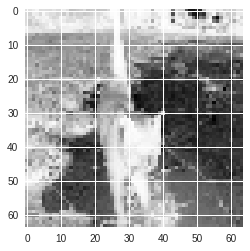

In [42]:
gray = cv2.cvtColor(X_test[1], cv2.COLOR_BGR2GRAY)
plt.imshow(gray)
y_test[1]

In [0]:
X_train = X_train/255
X_test = X_test/255

In [0]:
model = Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=3,activation=layers.activations.relu,data_format='channels_last',input_shape=[64,64,3]))
model.add(layers.MaxPool2D(pool_size=2,strides=2))
model.add(layers.Conv2D(filters=64, kernel_size=3,activation=layers.activations.relu))
model.add(layers.MaxPool2D(pool_size=2,strides=2))
model.add(layers.Conv2D(filters=128, kernel_size=3,activation=layers.activations.relu))
model.add(layers.MaxPool2D(pool_size=2,strides=2))
model.add(layers.Conv2D(filters=512, kernel_size=3,activation=layers.activations.relu))
model.add(layers.MaxPool2D(pool_size=2,strides=2))
model.add(layers.Flatten())
model.add(layers.Dense(128,activation=layers.activations.relu))
model.add(layers.Dense(128,activation=layers.activations.relu))
model.add(layers.Dense(2, activation=layers.activations.softmax))

In [0]:
model.compile(optimizer = keras.optimizers.Adam(lr=1e-5),loss = keras.losses.sparse_categorical_crossentropy,metrics=['accuracy'])

In [0]:
from keras.callbacks import TensorBoard
from time import time
tensorboard_ = TensorBoard(log_dir="logs/{}".format(time()))

In [58]:
model.fit(x=X_train, y=y_train, batch_size=128, epochs=50,verbose=2,validation_split = 0.1, callbacks=[tensorboard_])


Train on 21375 samples, validate on 2375 samples
Epoch 1/50
 - 9s - loss: 0.5718 - acc: 0.7070 - val_loss: 0.5674 - val_acc: 0.7086
Epoch 2/50
 - 9s - loss: 0.5661 - acc: 0.7105 - val_loss: 0.5644 - val_acc: 0.7015
Epoch 3/50
 - 9s - loss: 0.5589 - acc: 0.7156 - val_loss: 0.5589 - val_acc: 0.7069
Epoch 4/50
 - 8s - loss: 0.5498 - acc: 0.7223 - val_loss: 0.5496 - val_acc: 0.7200
Epoch 5/50
 - 8s - loss: 0.5456 - acc: 0.7282 - val_loss: 0.5444 - val_acc: 0.7175
Epoch 6/50
 - 8s - loss: 0.5388 - acc: 0.7302 - val_loss: 0.5404 - val_acc: 0.7272
Epoch 7/50
 - 8s - loss: 0.5296 - acc: 0.7399 - val_loss: 0.5328 - val_acc: 0.7322
Epoch 8/50
 - 9s - loss: 0.5245 - acc: 0.7429 - val_loss: 0.5290 - val_acc: 0.7305
Epoch 9/50
 - 8s - loss: 0.5191 - acc: 0.7466 - val_loss: 0.5230 - val_acc: 0.7364
Epoch 10/50
 - 8s - loss: 0.5131 - acc: 0.7504 - val_loss: 0.5144 - val_acc: 0.7461
Epoch 11/50
 - 8s - loss: 0.5071 - acc: 0.7546 - val_loss: 0.5157 - val_acc: 0.7469
Epoch 12/50
 - 8s - loss: 0.5022 - a

In [66]:
score=model.evaluate(x=X_test, y=y_test)
print(score)

1250/1250 [==============================] - 0s 374us/step
[0.4247300512909889, 0.804]


In [61]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 4, 4, 512)         590336    
__________

In [62]:
model2 = Sequential()
model2.add(layers.Conv2D(filters=32, kernel_size=3,activation=layers.activations.relu,data_format='channels_last',input_shape=[64,64,3]))
model2.add(layers.MaxPool2D(pool_size=2,strides=2))
model2.add(layers.Conv2D(filters=64, kernel_size=3,activation=layers.activations.relu))
model2.add(layers.MaxPool2D(pool_size=2,strides=2))
model2.add(layers.Flatten())
model2.add(layers.Dense(128,activation=layers.activations.relu))
model2.add(layers.Dense(128,activation=layers.activations.relu))
model2.add(layers.Dense(2, activation=layers.activations.softmax))
model2.compile(optimizer = keras.optimizers.Adam(lr=1e-5),loss = keras.losses.sparse_categorical_crossentropy,metrics=['accuracy'])
model2.fit(x=X_train, y=y_train, batch_size=128, epochs=50,verbose=2,validation_split = 0.1)

Train on 21375 samples, validate on 2375 samples
Epoch 1/50
 - 7s - loss: 0.6852 - acc: 0.5690 - val_loss: 0.6749 - val_acc: 0.6139
Epoch 2/50
 - 7s - loss: 0.6646 - acc: 0.6277 - val_loss: 0.6512 - val_acc: 0.6467
Epoch 3/50
 - 7s - loss: 0.6423 - acc: 0.6531 - val_loss: 0.6322 - val_acc: 0.6547
Epoch 4/50
 - 7s - loss: 0.6205 - acc: 0.6783 - val_loss: 0.6101 - val_acc: 0.6851
Epoch 5/50
 - 7s - loss: 0.6016 - acc: 0.6900 - val_loss: 0.5965 - val_acc: 0.6884
Epoch 6/50
 - 7s - loss: 0.5880 - acc: 0.6945 - val_loss: 0.5914 - val_acc: 0.6926
Epoch 7/50
 - 7s - loss: 0.5769 - acc: 0.7034 - val_loss: 0.5759 - val_acc: 0.7086
Epoch 8/50
 - 7s - loss: 0.5671 - acc: 0.7098 - val_loss: 0.5691 - val_acc: 0.7065
Epoch 9/50
 - 7s - loss: 0.5582 - acc: 0.7171 - val_loss: 0.5656 - val_acc: 0.7078
Epoch 10/50
 - 7s - loss: 0.5503 - acc: 0.7234 - val_loss: 0.5624 - val_acc: 0.7141
Epoch 11/50
 - 7s - loss: 0.5455 - acc: 0.7274 - val_loss: 0.5538 - val_acc: 0.7183
Epoch 12/50
 - 7s - loss: 0.5372 - a

In [64]:
score2=model2.evaluate(x=X_test, y=y_test)
print(score2)

1250/1250 [==============================] - 0s 292us/step
[0.4587086442947388, 0.7944]


In [63]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)               1605760   
_________________________________________________________________
dense_14 (Dense)             (None, 128)               16512     
__________